# This Notbook include 5 section

- Section 0 : Import Libraries
- Section 1 : Read & Check Data
- Section 2 : DataClean & Preprocessing
- Section 3 : EDA
- Section 4 : Prophet & ARIMA Forecasting
- Section 5 : Prophet & ARIMA Forecasting without free price

# Columns:

- Name: Name of the app.
- Rating: Rating for the app.
- No of People Rated : No of people who rated the app.
- Category : Category of the app.
- Date : Date when it is posted.
- Price : Price of the app.
- Price_usd : 1 indian rupee = 0.013 usd
- year
- month
- day
- day_of_week

# Import Libraries

In [ ]:
pip install chart_studio

In [18]:
#Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use("ggplot")
import plotly 
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go 
import chart_studio.plotly as py
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import fbprophet
from pandas.plotting import autocorrelation_plot

# 1) Read & Check Data 

In [19]:
data = pd.read_csv('msft.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB
None


Name  Rating  \
0                                     Dynamic Reader     3.5   
1  Chemistry, Organic Chemistry and Biochemistry-...     3.0   
2                                         BookViewer     3.5   
3                                 Brick Instructions     3.5   
4  Introduction to Python Programming by GoLearni...     2.0   

   No of people Rated Category        Date Price  
0                 268    Books  07-01-2014  Free  
1                 627    Books  08-01-2014  Free  
2                 593    Books  29-02-2016  Free  
3                 684    Books  30-01-2018  Free  
4                 634    Books  30-01-2018  Free

# 2) Data Clean & Preprocessing

- Drop NaN rows
- Change Price type.

In [20]:
print(data.isna().sum())

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64


In [21]:
data = data.dropna(axis=0)
print(data.isna().sum())

Name                  0
Rating                0
No of people Rated    0
Category              0
Date                  0
Price                 0
dtype: int64


# Price

In [22]:
data.Price.unique()

array(['Free', '₹ 144.00', '₹ 54.00', '₹ 99.00', '₹ 219.00', '₹ 269.00',
       '₹ 134.00', '₹ 164.00', '₹ 109.00', '₹ 1,624.00', '₹ 1,099.00',
       '₹ 1,349.00', '₹ 59.00', '₹ 154.00', '₹ 119.00', '₹ 94.00',
       '₹ 69.00', '₹ 139.00', '₹ 189.00', '₹ 549.00', '₹ 79.00',
       '₹ 2,599.00', '₹ 299.00', '₹ 574.00', '₹ 329.40', '₹ 1,521.80',
       '₹ 324.00', '₹ 824.00', '₹ 5,449.00', '₹ 89.50', '₹ 114.00',
       '₹ 194.00', '₹ 319.00', '₹ 624.00', '₹ 2,149.00', '₹ 1,149.00',
       '₹ 434.00', '₹ 279.00', '₹ 209.00', '₹ 699.00', '₹ 1,899.00',
       '₹ 489.00', '₹ 54.50', '₹ 64.00'], dtype=object)

In [23]:
data['Price'] = data['Price'].replace('Free','₹ 0')
data['Price'] = data['Price'].apply(lambda x:x.split(' ',1)[1])
data['Price'] = data['Price'].str.replace(',', '').astype('float64')

In [24]:
data['Price_usd'] = data['Price']*0.013

# Date

In [25]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek

data['dat_of_week'] = [{0:Monday ... 6:Sunday}]

# ---------------------------------------------------------------------------------------------------------------

# 3) EDA

Text(0, 0.5, 'Price_usd')

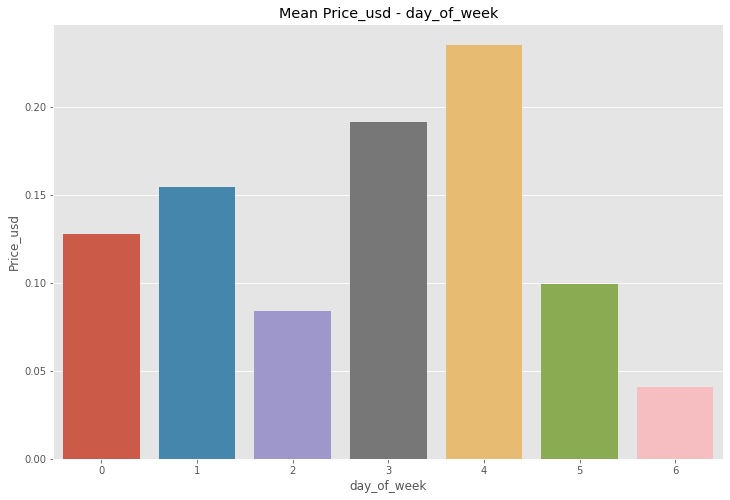

In [26]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data.groupby('day_of_week').Price_usd.mean().index, 
                 y=data.groupby('day_of_week').Price_usd.mean().values, data=data)
ax.set_title('Mean Price_usd - day_of_week')
ax.set_xlabel('day_of_week')
ax.set_ylabel('Price_usd')

Text(0, 0.5, 'Price_usd')

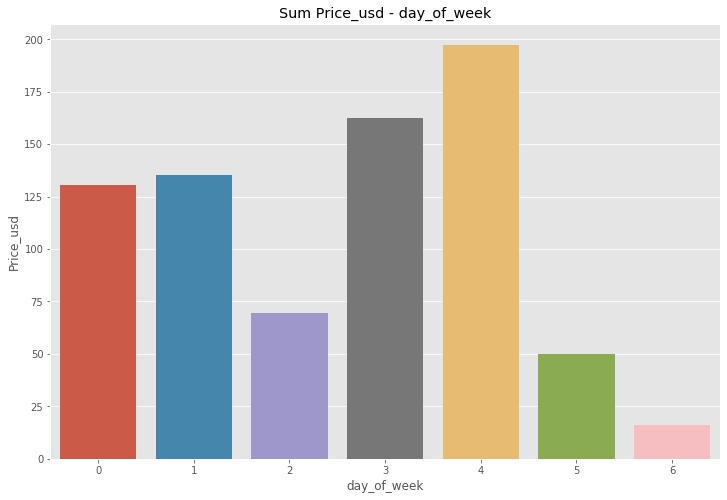

In [27]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data.groupby('day_of_week').Price_usd.sum().index, 
                 y=data.groupby('day_of_week').Price_usd.sum().values, data=data)
ax.set_title('Sum Price_usd - day_of_week')
ax.set_xlabel('day_of_week')
ax.set_ylabel('Price_usd')

Text(0, 0.5, 'Price_usd')

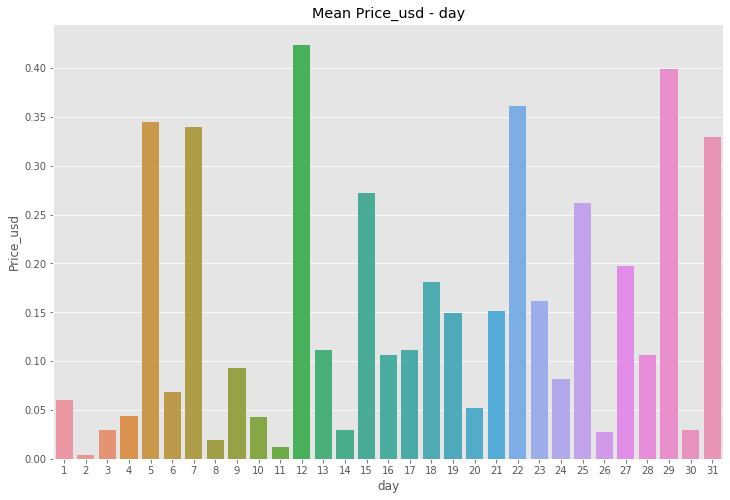

In [28]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data.groupby('day').Price_usd.mean().index, 
                 y=data.groupby('day').Price_usd.mean().values, data=data)
ax.set_title('Mean Price_usd - day')
ax.set_xlabel('day')
ax.set_ylabel('Price_usd')

Text(0, 0.5, 'Price_usd')

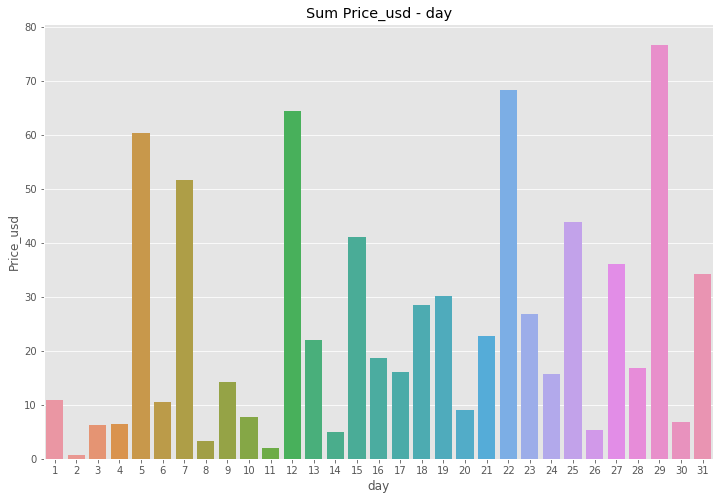

In [29]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data.groupby('day').Price_usd.sum().index, 
                 y=data.groupby('day').Price_usd.sum().values, data=data)
ax.set_title('Sum Price_usd - day')
ax.set_xlabel('day')
ax.set_ylabel('Price_usd')

Text(0, 0.5, 'Price_usd')

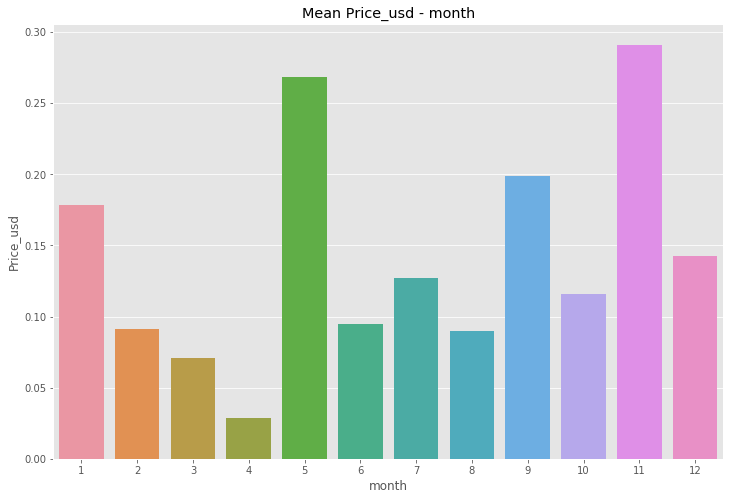

In [30]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data.groupby('month').Price_usd.mean().index, 
                 y=data.groupby('month').Price_usd.mean().values, data=data)
ax.set_title('Mean Price_usd - month')
ax.set_xlabel('month')
ax.set_ylabel('Price_usd')

Text(0, 0.5, 'Price_usd')

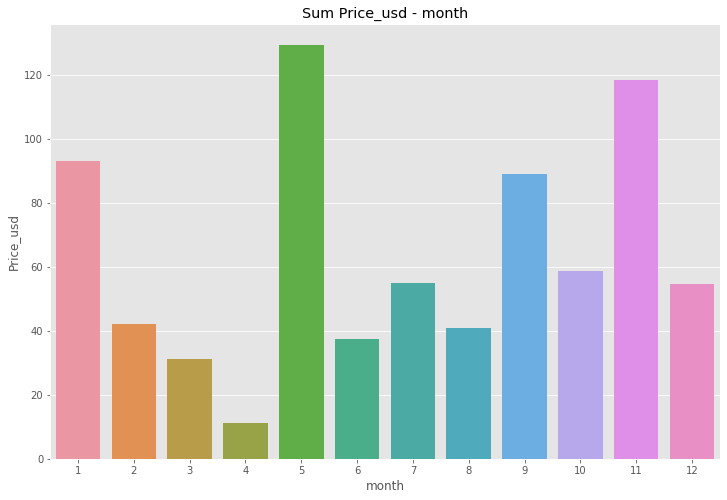

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data.groupby('month').Price_usd.sum().index, 
                 y=data.groupby('month').Price_usd.sum().values, data=data)
ax.set_title('Sum Price_usd - month')
ax.set_xlabel('month')
ax.set_ylabel('Price_usd')

Text(0, 0.5, 'Price_usd')

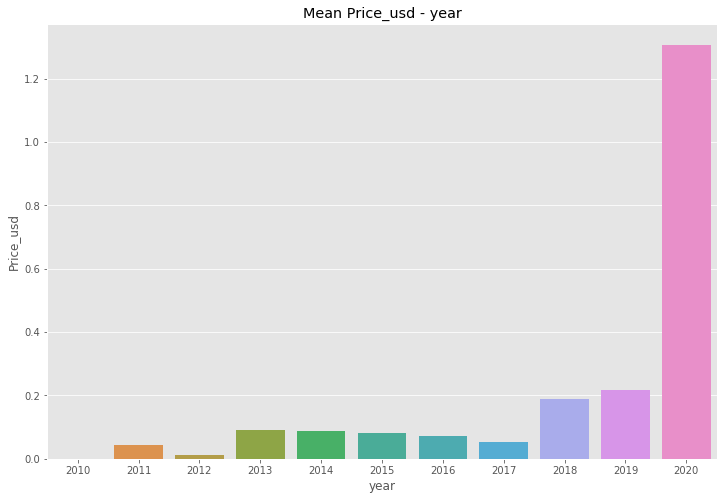

In [32]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data.groupby('year').Price_usd.mean().index, 
                 y=data.groupby('year').Price_usd.mean().values, data=data)
ax.set_title('Mean Price_usd - year')
ax.set_xlabel('year')
ax.set_ylabel('Price_usd')

Text(0, 0.5, 'Price_usd')

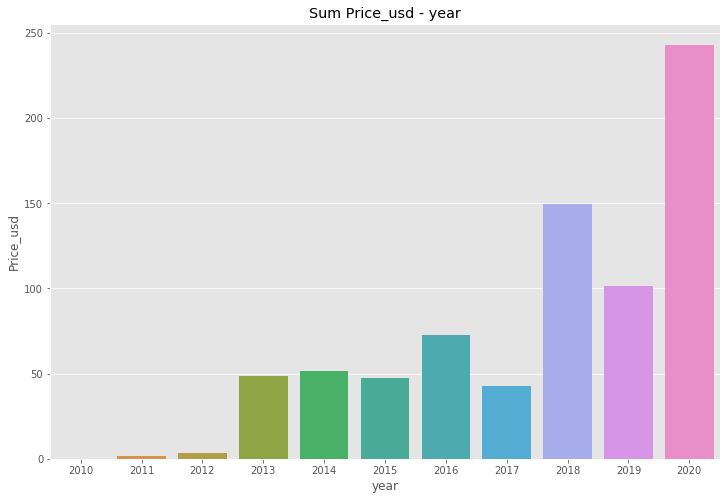

In [33]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data.groupby('year').Price_usd.sum().index, 
                 y=data.groupby('year').Price_usd.sum().values, data=data)
ax.set_title('Sum Price_usd - year')
ax.set_xlabel('year')
ax.set_ylabel('Price_usd')

[Text(0, 0, 'Books'),
 Text(0, 0, 'Business'),
 Text(0, 0, 'Developer Tools'),
 Text(0, 0, 'Social'),
 Text(0, 0, 'Food and Dining'),
 Text(0, 0, 'Government and Politics'),
 Text(0, 0, 'Health and Fitness'),
 Text(0, 0, 'Kids and Family'),
 Text(0, 0, 'Lifestyle'),
 Text(0, 0, 'Multimedia Design'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Navigation and Maps'),
 Text(0, 0, 'News and Weather')]

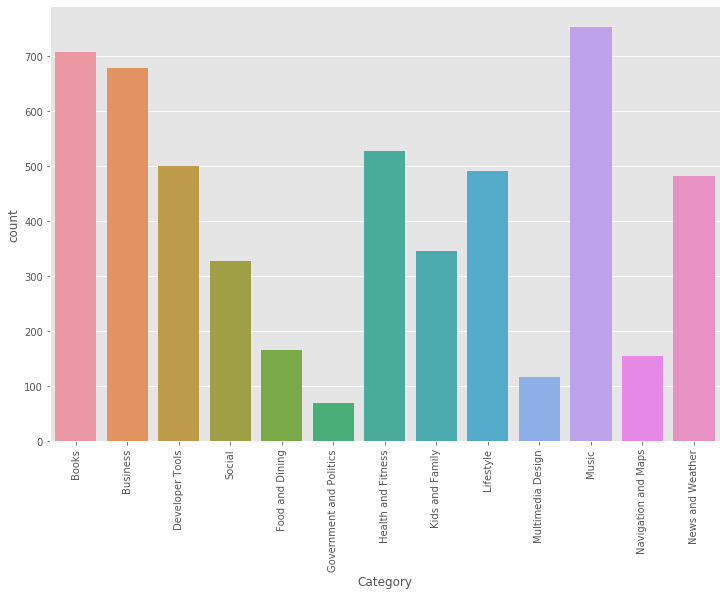

In [39]:
plt.figure(figsize=(12,8))
chart = sns.countplot(x=data['Category'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [35]:
data_rating = data.Rating.value_counts()
fig = go.Figure(data=[
    go.Bar(name='Rating', x=data_rating.index, y=data_rating),
])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(barmode='group', hovermode='x', title_text='Rating')
fig.show()

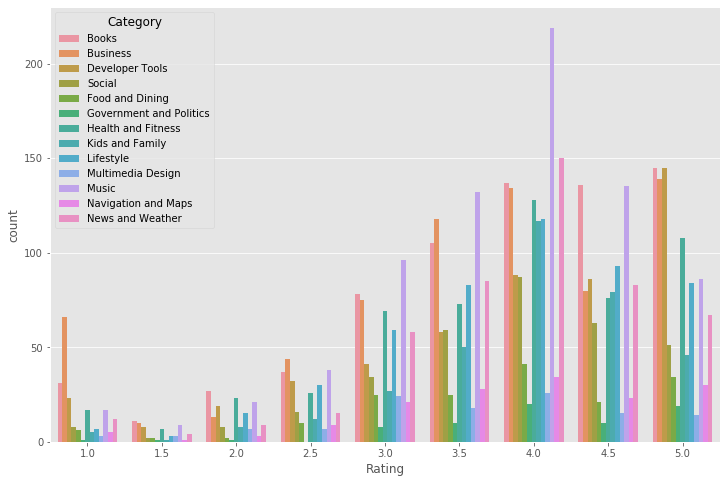

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x='Rating',data=data,hue='Category')

In [37]:
data_free = data.Category[data.Price_usd == 0].value_counts()
data_pay = data.Category[data.Price_usd != 0].value_counts()
fig = go.Figure(data=[
    go.Bar(name='Free', x=data_free.index, y=data_free),
    go.Bar(name='Paid', x=data_pay.index, y=data_pay)
])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(barmode='group', hovermode='x', title_text='Free/Paid Apps')
fig.show()


#  Auto Correlation

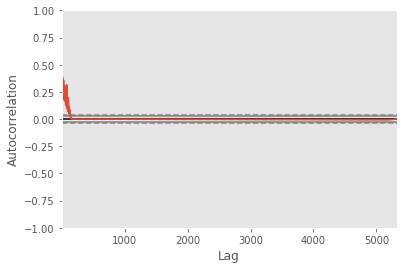

In [38]:
autocorrelation_plot(data['Price_usd'])
pyplot.show()

# 4) Forecasting Models 

# Forecasting with Prophet

In [40]:
prophet_data = data.rename(columns={'Date': 'ds', 'Price_usd': 'y'})
fbp = fbprophet.Prophet()
fbp.fit(prophet_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Energy Consumption of Turkey (MWh)')

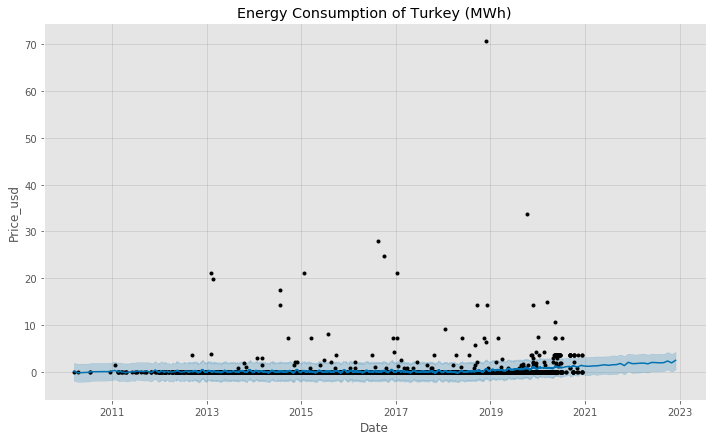

In [41]:
data_forecast = fbp.make_future_dataframe(periods=24,freq='M')
data_forecast = fbp.predict(data_forecast)
fbp.plot(data_forecast, xlabel = 'Date', ylabel = 'Price_usd')
plt.title('Energy Consumption of Turkey (MWh)')

Change points:
170    2012-09-24
340    2012-12-21
511    2013-04-12
681    2013-07-23
851    2013-12-04
1021   2014-03-20
1191   2014-07-12
1362   2014-10-01
1532   2015-02-03
1702   2015-05-15
1872   2015-09-06
2042   2015-12-14
2213   2016-02-15
2383   2016-04-11
2553   2016-06-15
2723   2016-08-18
2893   2016-10-11
3064   2016-12-23
3234   2017-03-04
3404   2017-05-19
3574   2017-08-17
3744   2017-10-30
3915   2018-01-29
4085   2018-02-28
4255   2018-05-24
Name: ds, dtype: datetime64[ns]


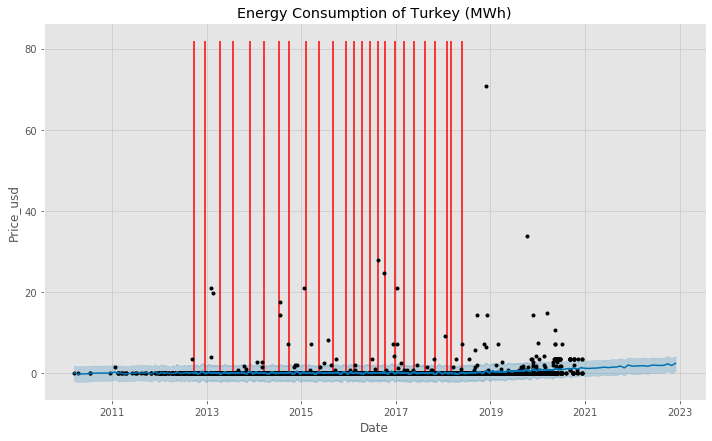

In [42]:
fbp.plot(data_forecast, xlabel = 'Date', ylabel = 'Price_usd')
plt.vlines([date for date in fbp.changepoints],ymin=0,ymax=82, color='r')
plt.title('Energy Consumption of Turkey (MWh)')
print('Change points:')
print(fbp.changepoints)

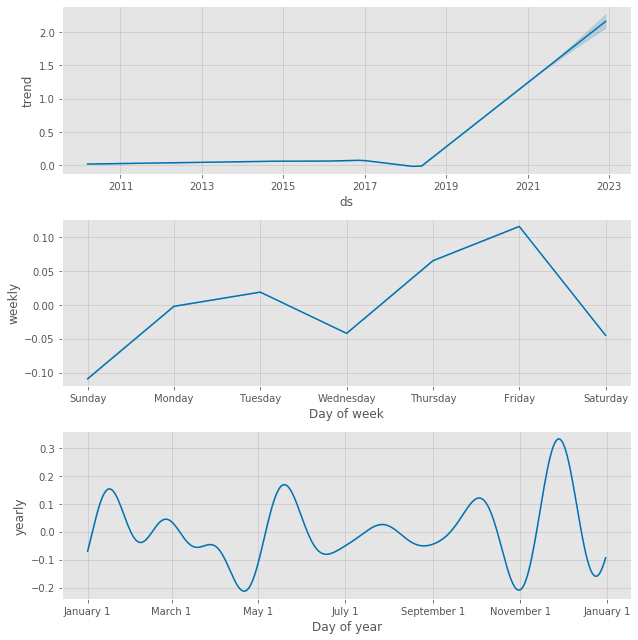

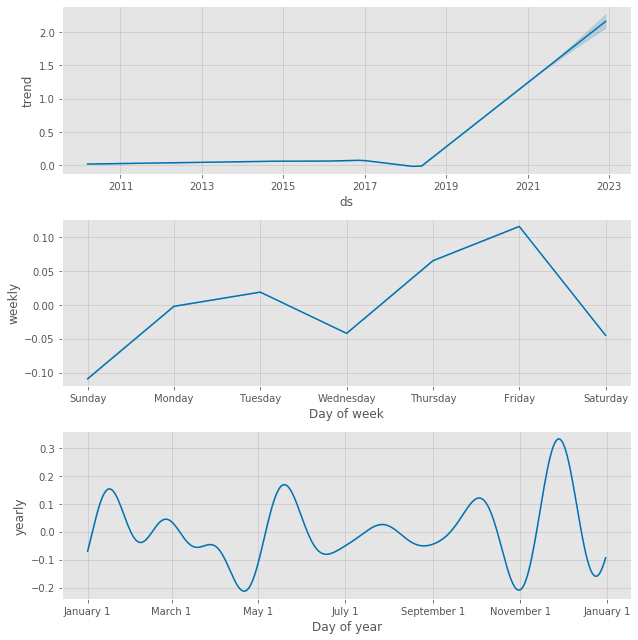

In [43]:
fbp.plot_components(data_forecast)

# Daily - Weekly - Monthly

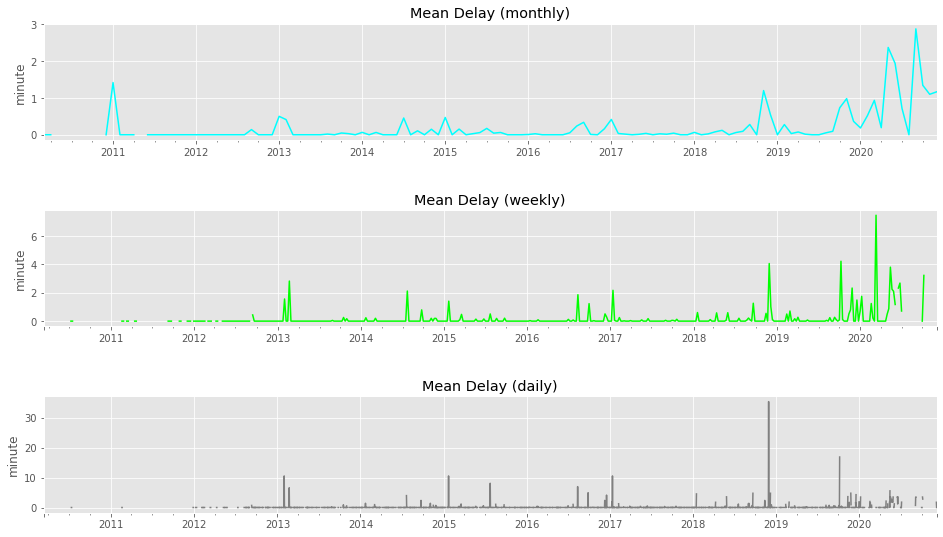

In [44]:
f,ax=plt.subplots(3,1,figsize=(16,9))

data1 = data.resample('M', on='Date').mean()
data2 = data.resample('W', on='Date').mean()
data3 = data.resample('D', on='Date').mean()

data1['Price_usd'].plot(ax = ax[0], color = 'cyan')
ax[0].set_title('Mean Delay (monthly)')
ax[0].set_xlabel('')
ax[0].set_ylabel('minute')

data2['Price_usd'].plot(ax = ax[1], color = 'lime')
ax[1].set_title('Mean Delay (weekly)')
ax[1].set_xlabel('')
ax[1].set_ylabel('minute')

data3['Price_usd'].plot(ax = ax[2], color = 'grey')
ax[2].set_title('Mean Delay (daily)')
ax[2].set_xlabel('')
ax[2].set_ylabel('minute')

f.subplots_adjust(hspace=0.6)
plt.show()

# ARIMA

In [45]:
model = ARIMA(data['Price_usd'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Price_usd   No. Observations:                 5320
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9228.266
Method:                       css-mle   S.D. of innovations              1.371
Date:                Mon, 27 Jul 2020   AIC                          18470.531
Time:                        18:35:42   BIC                          18516.586
Sample:                             1   HQIC                         18486.622
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.005      0.089      0.929      -0.009       0.010
ar.L1.D.Price_usd    -0.9096      0.013    -68.246      0.000      -0.936      -0.883
ar.L2.D.Price_usd    -0.

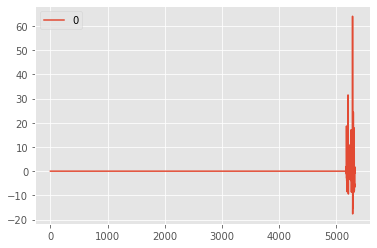

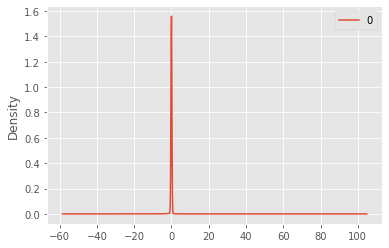

                  0
count  5.320000e+03
mean  -3.702805e-07
std    1.371190e+00
min   -1.766102e+01
25%   -1.676246e-03
50%   -1.676246e-03
75%   -1.676246e-03
max    6.399014e+01


In [46]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

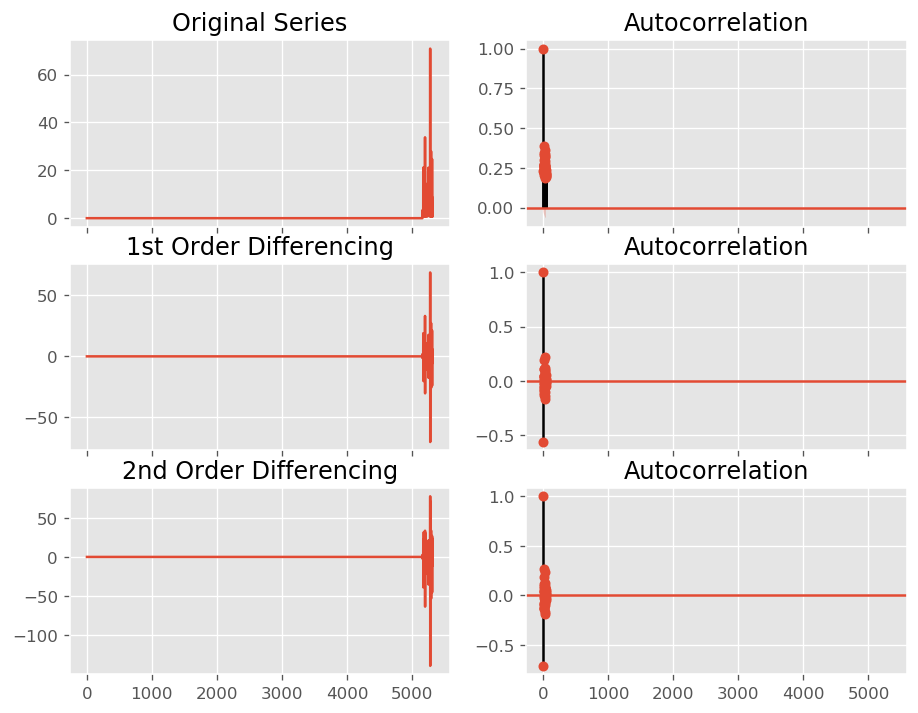

In [47]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.Price_usd); axes[0, 0].set_title('Original Series')
plot_acf(data.Price_usd, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.Price_usd.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.Price_usd.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.Price_usd.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.Price_usd.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

# 5) Forecasting Models without Free Price

We have got so many 0 value in data['Price_usd'] so I drop that and check again.

# Prophet without 0 

In [48]:
drop_0_list = data.index[data["Price_usd"] == 0].tolist()
drop_0 = data.drop(drop_0_list)
drop_0.head()

Name  Rating  No of people Rated  \
5163                 Bluestacks app player: guide     1.5                 760   
5164             Adobe Acrobat Reader DC PC Guide     2.0                 163   
5165  Play Books Online (Client For Google Books)     2.5                 292   
5166                              WinRAR PC-Guide     1.0                 523   
5167               Windows Movie Maker : PC Guide     1.0                 515   

     Category       Date  Price  Price_usd  year  month  day  day_of_week  
5163    Books 2019-12-16  144.0      1.872  2019     12   16            0  
5164    Books 2020-06-28  144.0      1.872  2020      6   28            6  
5165    Books 2016-01-14   54.0      0.702  2016      1   14            3  
5166    Books 2019-11-22   99.0      1.287  2019     11   22            4  
5167    Books 2020-06-22  144.0      1.872  2020      6   22            0

In [49]:
prophet_data_2 = drop_0.rename(columns={'Date': 'ds', 'Price_usd': 'y'})
fbp_2 = fbprophet.Prophet()
fbp_2.fit(prophet_data_2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Energy Consumption of Turkey (MWh)')

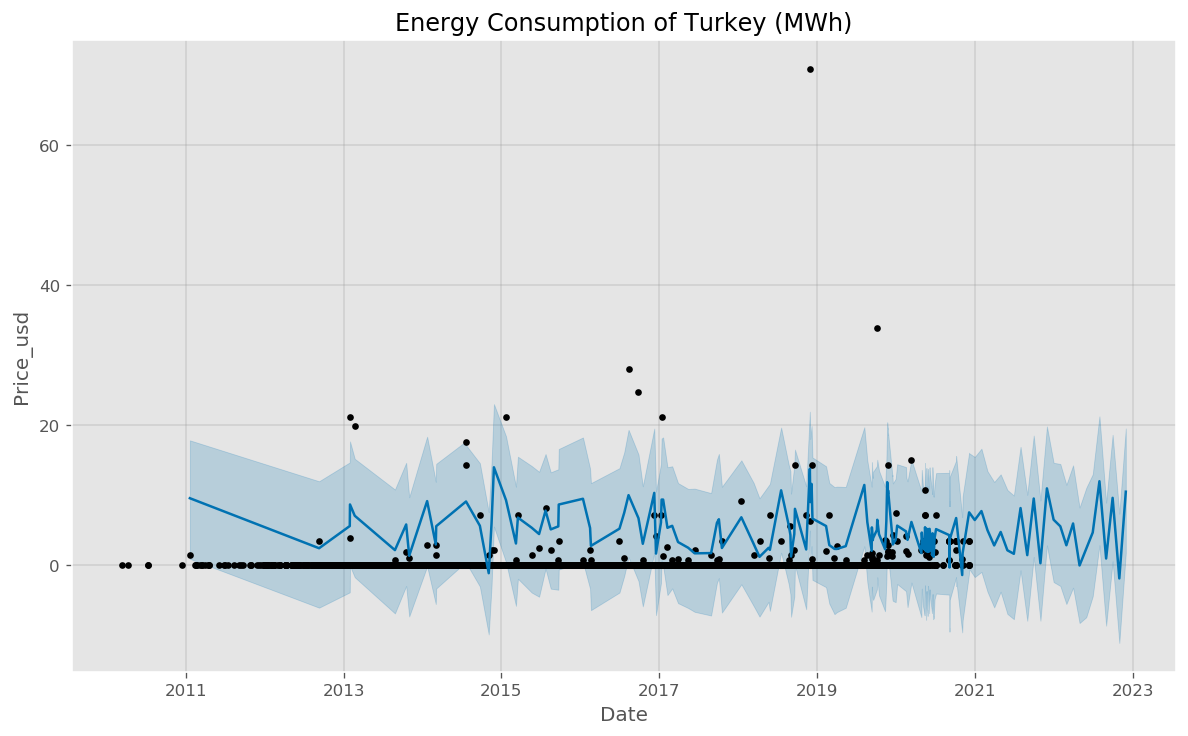

In [50]:
data_forecast_2 = fbp_2.make_future_dataframe(periods=24,freq='M')
data_forecast_2 = fbp_2.predict(data_forecast_2)
fbp.plot(data_forecast_2, xlabel = 'Date', ylabel = 'Price_usd')
plt.title('Energy Consumption of Turkey (MWh)')

Change points:
5     2013-08-27
10    2014-03-06
15    2014-11-17
20    2015-05-22
25    2015-09-24
30    2016-07-23
35    2016-12-17
40    2017-03-02
45    2017-09-25
50    2018-04-10
55    2018-08-31
60    2018-11-29
65    2019-02-27
70    2019-08-22
75    2019-09-18
80    2019-11-18
85    2019-11-26
90    2020-01-07
95    2020-04-28
100   2020-05-15
105   2020-05-15
110   2020-05-19
115   2020-05-20
120   2020-05-25
125   2020-05-27
Name: ds, dtype: datetime64[ns]


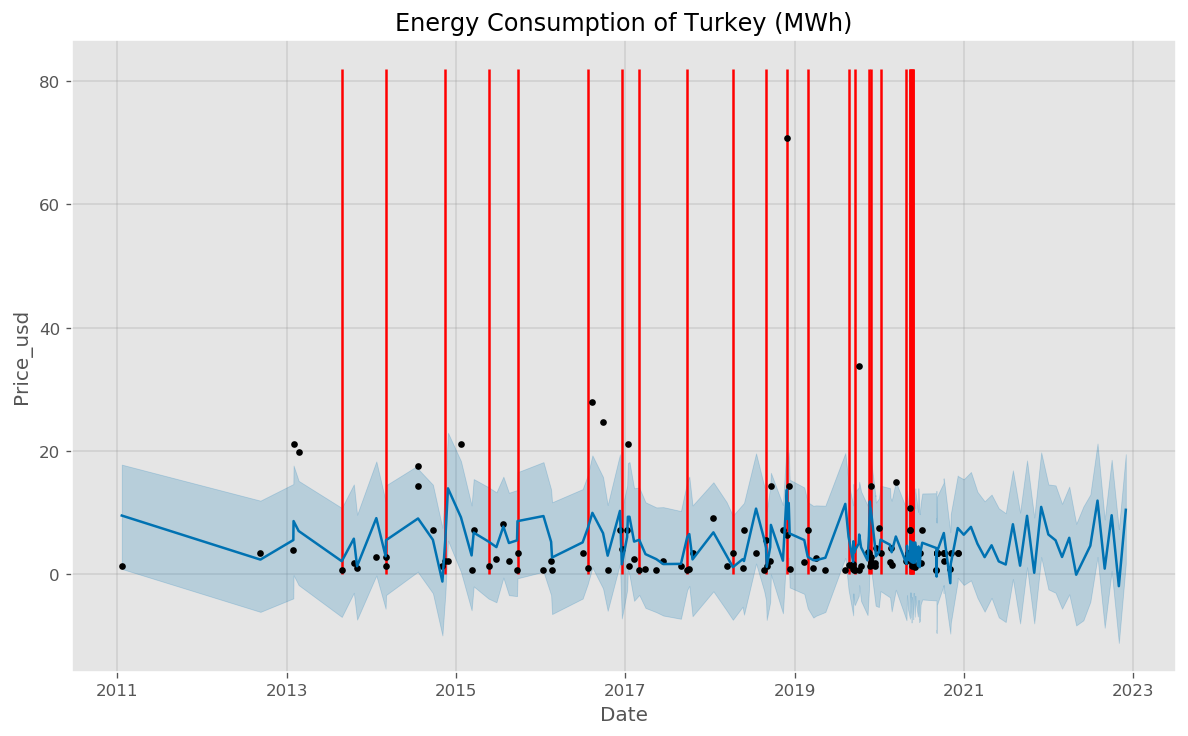

In [51]:
fbp_2.plot(data_forecast_2, xlabel = 'Date', ylabel = 'Price_usd')
plt.vlines([date for date in fbp_2.changepoints],ymin=0,ymax=82, color='r')
plt.title('Energy Consumption of Turkey (MWh)')
print('Change points:')
print(fbp_2.changepoints)

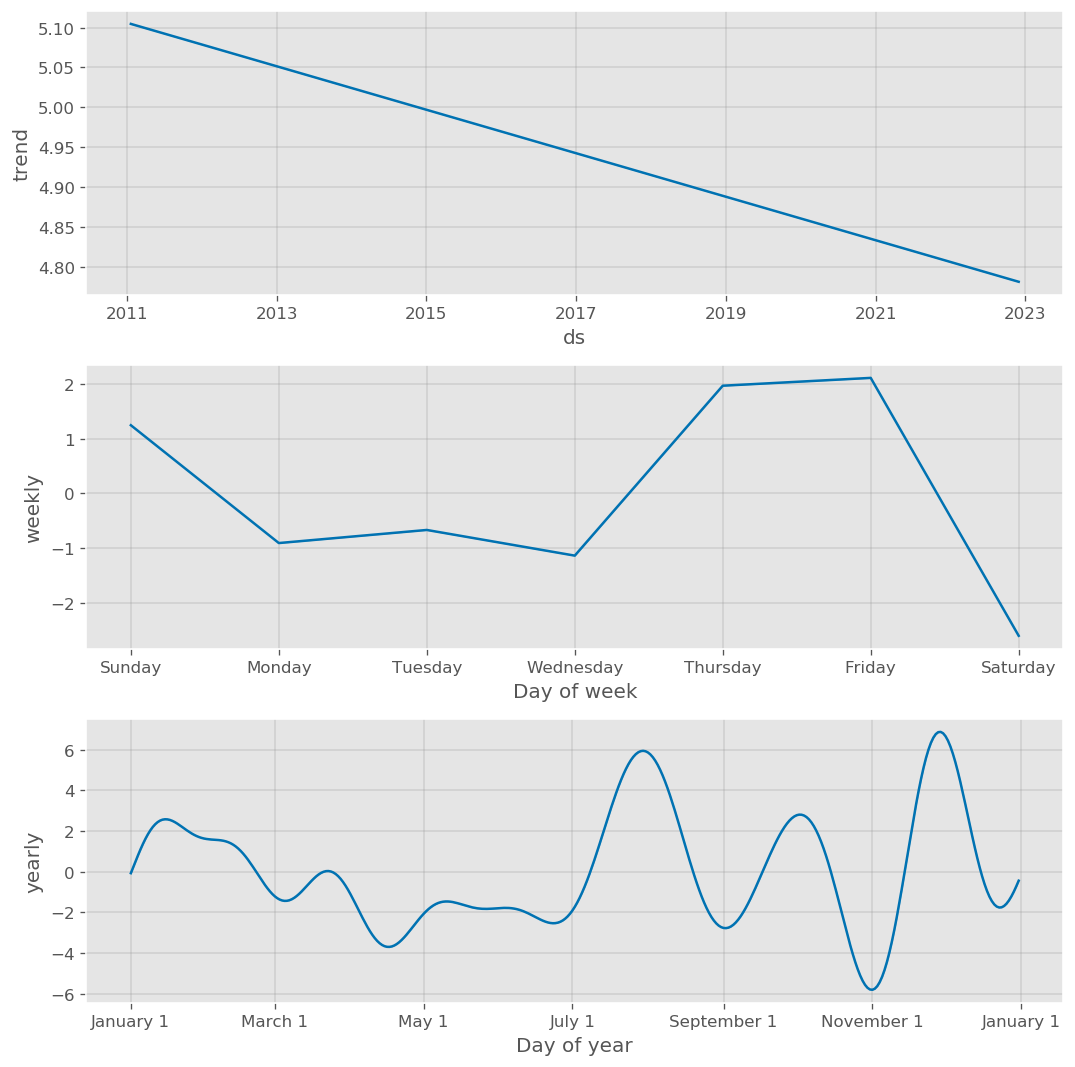

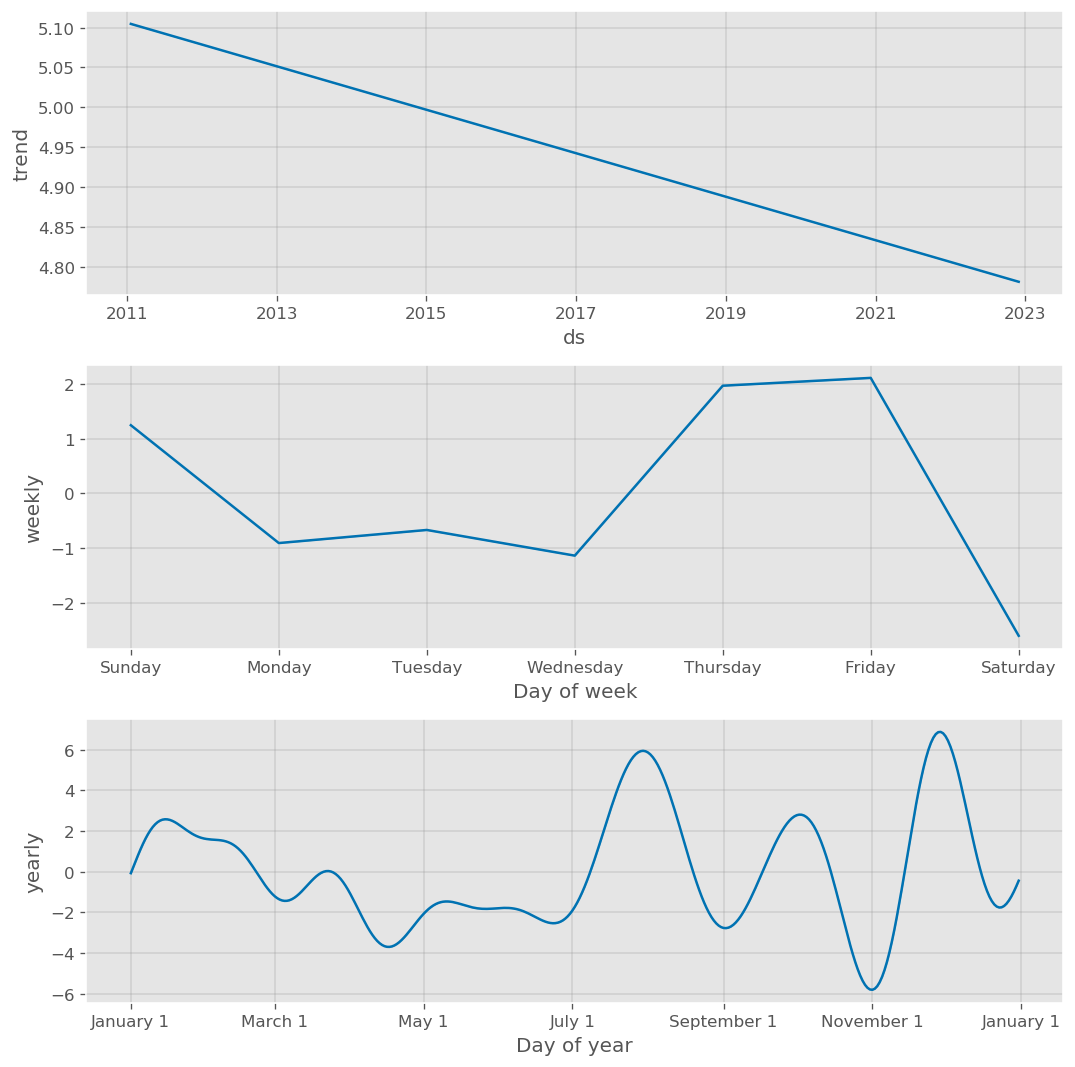

In [52]:
fbp_2.plot_components(data_forecast_2)

# Daily - Weekly - Monthly

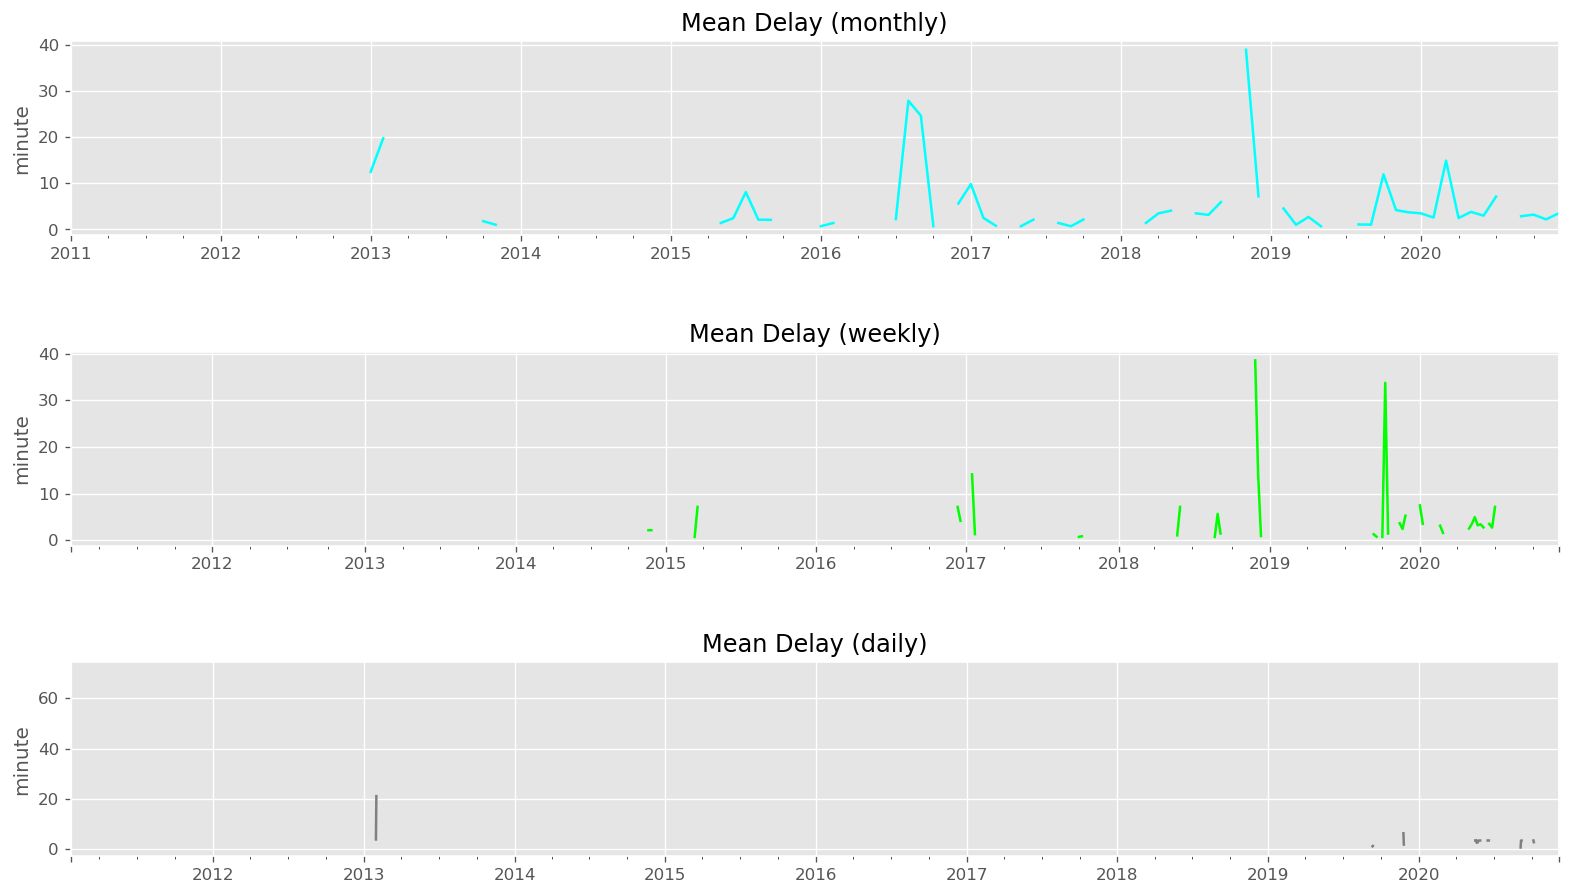

In [53]:
f,ax=plt.subplots(3,1,figsize=(16,9))

data1_1 = drop_0.resample('M', on='Date').mean()
data2_1 = drop_0.resample('W', on='Date').mean()
data3_1 = drop_0.resample('D', on='Date').mean()

data1_1['Price_usd'].plot(ax = ax[0], color = 'cyan')
ax[0].set_title('Mean Delay (monthly)')
ax[0].set_xlabel('')
ax[0].set_ylabel('minute')

data2_1['Price_usd'].plot(ax = ax[1], color = 'lime')
ax[1].set_title('Mean Delay (weekly)')
ax[1].set_xlabel('')
ax[1].set_ylabel('minute')

data3_1['Price_usd'].plot(ax = ax[2], color = 'grey')
ax[2].set_title('Mean Delay (daily)')
ax[2].set_xlabel('')
ax[2].set_ylabel('minute')

f.subplots_adjust(hspace=0.6)
plt.show()

# ARIMA without 0

In [54]:
model_2 = ARIMA(drop_0['Price_usd'], order=(5,1,0))
model_fit_2 = model_2.fit(disp=0)
print(model_fit_2.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Price_usd   No. Observations:                  157
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -549.410
Method:                       css-mle   S.D. of innovations              7.978
Date:                Mon, 27 Jul 2020   AIC                           1112.821
Time:                        18:39:08   BIC                           1134.215
Sample:                             1   HQIC                          1121.510
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0049      0.174      0.028      0.977      -0.336       0.345
ar.L1.D.Price_usd    -0.9044      0.077    -11.682      0.000      -1.056      -0.753
ar.L2.D.Price_usd    -0.

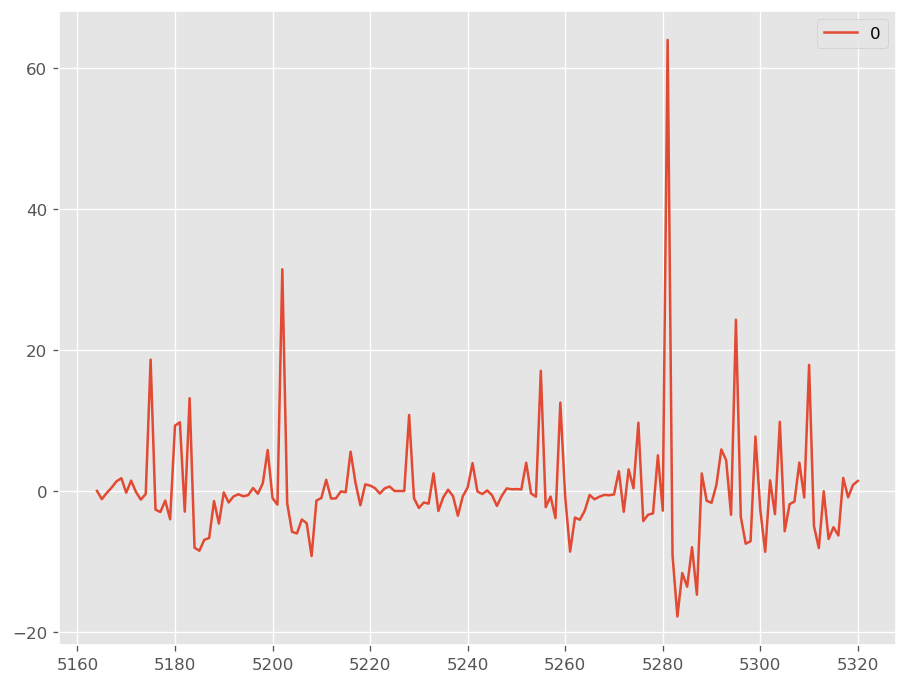

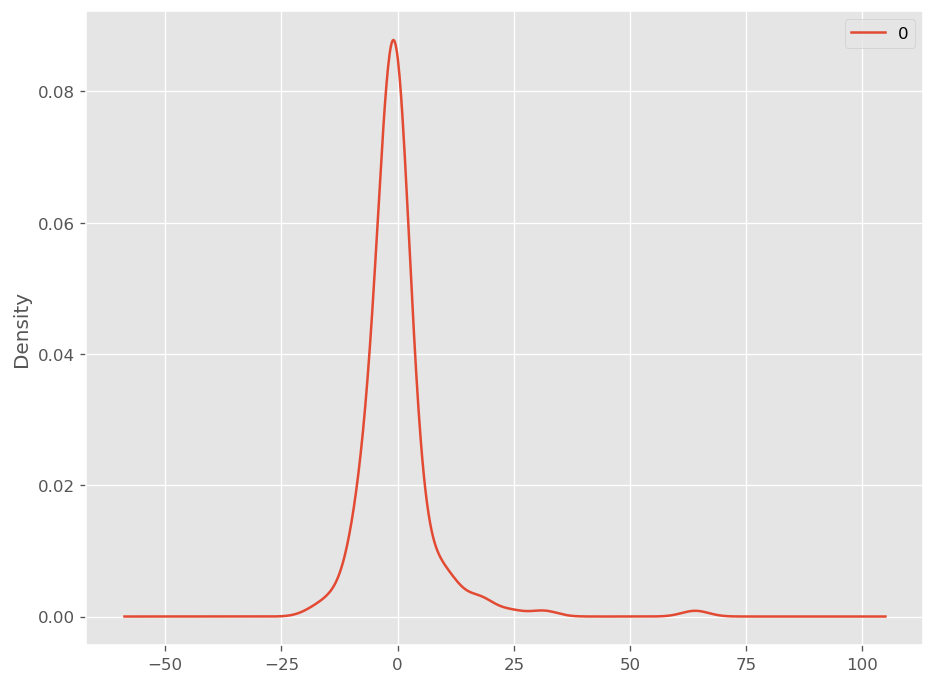

                0
count  157.000000
mean    -0.003042
std      8.004116
min    -17.840504
25%     -2.952696
50%     -0.766799
75%      0.619039
max     64.029719


In [55]:
residuals_2 = pd.DataFrame(model_fit_2.resid)
residuals_2.plot()
pyplot.show()
residuals_2.plot(kind='kde')
pyplot.show()
print(residuals_2.describe())

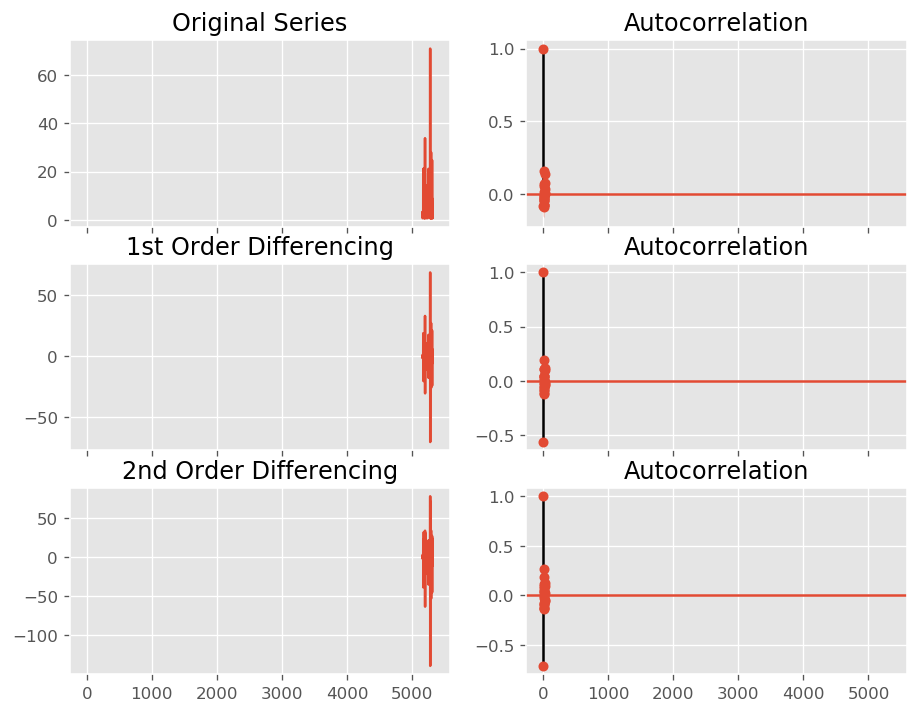

In [56]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(drop_0.Price_usd); axes[0, 0].set_title('Original Series')
plot_acf(drop_0.Price_usd, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(drop_0.Price_usd.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(drop_0.Price_usd.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(drop_0.Price_usd.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(drop_0.Price_usd.diff().diff().dropna(), ax=axes[2, 1])

plt.show()